In [4]:
from numpy import load
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from tensorflow.keras import backend as K

In [5]:
#Loading arrays from disk
def load_arrays(pathx, pathy):
    dict_data_x = load(pathx)
    dict_data_y = load(pathy)
    x = dict_data_x['arr_0']
    y = dict_data_y['arr_0']
    return x, y

In [6]:
#Function for plotting training afterwards
def plot_training(H):
    plt.style.use("ggplot")
    plt.figure()
    plt.plot(H.history["loss"], label="train_loss")
    plt.plot(H.history["val_loss"], label="val_loss")
    plt.plot(H.history["accuracy"], label="train_acc")
    plt.plot(H.history["val_accuracy"], label="val_acc")
    plt.title("Training Loss and Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Loss/Accuracy")
    plt.legend(loc="lower left")

In [3]:
#Load the arrays
x, y = load_arrays("data_2500_samples/data_x_2500.npz", "data_2500_samples/data_y_2500.npz")

In [4]:
#Check shapes of the arrays
print(x.shape)
print(y.shape)

(5000, 2, 123, 1650, 1)
(5000, 1)


In [5]:
#Split the dataset randomly
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [6]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3750, 2, 123, 1650, 1)
(3750, 1)
(1250, 2, 123, 1650, 1)
(1250, 1)


In [7]:
#Preprocessing
x_train = x_train / 255.
x_test = x_test / 255.

In [56]:
def build_siamese_model(input_shape):
    
    inputs = keras.layers.Input(input_shape)
    
    x = keras.layers.Conv2D(16, (2,2), activation="relu")(inputs)
    x = keras.layers.MaxPool2D(2,2)(x)

    x = keras.layers.Conv2D(32, (2,2), activation="relu")(x)
    x = keras.layers.MaxPool2D(2,2)(x)
    
    x = keras.layers.Flatten()(x)
    outputs = keras.layers.Dense(16, activation="relu")(x)
    
    model = keras.models.Model(inputs, outputs)
    
    return model

In [48]:
input_dim = (x_train.shape[2:])
base_network = build_siamese_model(input_dim)

In [49]:
img_a = keras.layers.Input(shape=input_dim)
img_b = keras.layers.Input(shape=input_dim)

In [50]:
feat_vec_a = base_network(img_a)
feat_vec_b = base_network(img_b)

In [51]:
def euclidian_distance(vects):
    x, y = vects
    distance = K.sqrt(K.sum(K.square(x-y), axis=1, keepdims=True))
    return distance

In [52]:
def euclidian_output_shape(shapes):
    shape1, shape2 = shapes
    return (shape1[0], 1)

In [53]:
distance = keras.layers.Lambda(euclidian_distance, output_shape=euclidian_output_shape)([feat_vec_a, feat_vec_b])

In [54]:
model = keras.models.Model(inputs=[img_a, img_b], outputs=distance)

In [55]:
model.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [90]:
history=model.fit([x_train[:, 0], x_train[:, 1]], y_train, validation_data=([x_test[:, 0], x_test[:, 1]], y_test), epochs=10, batch_size=32)

Epoch 1/10
118/118 [==============================] - 11s 89ms/step - loss: 0.7212 - accuracy: 0.5056 - val_loss: 8.0333 - val_accuracy: 0.4792
Epoch 2/10
118/118 [==============================] - 9s 76ms/step - loss: 0.7282 - accuracy: 0.4965 - val_loss: 8.0333 - val_accuracy: 0.4792
Epoch 3/10
118/118 [==============================] - 9s 76ms/step - loss: 0.7263 - accuracy: 0.5091 - val_loss: 8.0333 - val_accuracy: 0.4792
Epoch 4/10
118/118 [==============================] - 9s 76ms/step - loss: 0.7239 - accuracy: 0.5003 - val_loss: 8.0333 - val_accuracy: 0.4792
Epoch 5/10
118/118 [==============================] - 9s 76ms/step - loss: 0.7328 - accuracy: 0.4840 - val_loss: 8.0333 - val_accuracy: 0.4792
Epoch 6/10
118/118 [==============================] - 9s 76ms/step - loss: 0.7272 - accuracy: 0.5024 - val_loss: 8.0333 - val_accuracy: 0.4792
Epoch 7/10
118/118 [==============================] - 9s 76ms/step - loss: 0.7267 - accuracy: 0.4949 - val_loss: 8.0333 - val_accuracy: 0.479

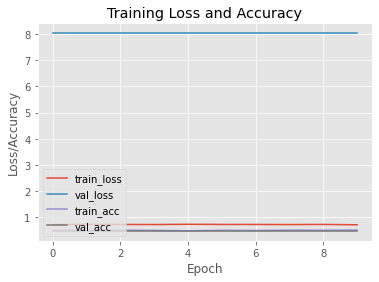

In [91]:
plot_training(history)

In [7]:
#Load the arrays
x, y = load_arrays("data_3000_samples/data_x_3000.npz", "data_3000_samples/data_y_3000.npz")

In [8]:
#Split the dataset randomly
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [9]:
#Preprocessing
x_train = x_train / 255.
x_test = x_test / 255.

In [10]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4500, 2, 150, 150, 1)
(4500, 1)
(1500, 2, 150, 150, 1)
(1500, 1)


In [57]:
input_dim = (x_train.shape[2:])
base_network = build_siamese_model(input_dim)

In [58]:
img_a = keras.layers.Input(shape=input_dim)
img_b = keras.layers.Input(shape=input_dim)

In [59]:
feat_vec_a = base_network(img_a)
feat_vec_b = base_network(img_b)

In [60]:
def euclidian_distance(vects):
    x, y = vects
    distance = K.sqrt(K.sum(K.square(x-y), axis=1, keepdims=True))
    return distance

def euclidian_output_shape(shapes):
    shape1, shape2 = shapes
    return (shape1[0], 1)

In [61]:
distance = keras.layers.Lambda(euclidian_distance, output_shape=euclidian_output_shape)([feat_vec_a, feat_vec_b])

In [62]:
model = keras.models.Model(inputs=[img_a, img_b], outputs=distance)

In [63]:
base_network.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 150, 150, 1)]     0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 149, 149, 16)      80        
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 73, 73, 32)        2080      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 41472)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 16)                6635

In [64]:
model.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [67]:
history=model.fit([x_train[:, 0], x_train[:, 1]], y_train, validation_data=([x_test[:, 0], x_test[:, 1]], y_test), epochs=100, batch_size=128)

Epoch 1/100
36/36 [==============================] - 1s 37ms/step - loss: 0.6658 - accuracy: 0.7858 - val_loss: 1.3970 - val_accuracy: 0.4773
Epoch 2/100
36/36 [==============================] - 1s 31ms/step - loss: 0.6575 - accuracy: 0.8000 - val_loss: 1.4101 - val_accuracy: 0.4820
Epoch 3/100
36/36 [==============================] - 1s 32ms/step - loss: 0.6620 - accuracy: 0.8136 - val_loss: 1.4970 - val_accuracy: 0.4927
Epoch 4/100
36/36 [==============================] - 1s 31ms/step - loss: 0.6442 - accuracy: 0.8202 - val_loss: 1.5589 - val_accuracy: 0.5000
Epoch 5/100
36/36 [==============================] - 1s 32ms/step - loss: 0.6907 - accuracy: 0.7871 - val_loss: 1.4611 - val_accuracy: 0.5000
Epoch 6/100
36/36 [==============================] - 1s 32ms/step - loss: 0.7366 - accuracy: 0.7547 - val_loss: 1.5584 - val_accuracy: 0.5040
Epoch 7/100
36/36 [==============================] - 1s 32ms/step - loss: 0.7372 - accuracy: 0.7660 - val_loss: 1.5185 - val_accuracy: 0.5033
Epoch 

36/36 [==============================] - 1s 32ms/step - loss: 0.6604 - accuracy: 0.8700 - val_loss: 2.7514 - val_accuracy: 0.4907
Epoch 59/100
36/36 [==============================] - 1s 31ms/step - loss: 0.6939 - accuracy: 0.8720 - val_loss: 2.5531 - val_accuracy: 0.4873
Epoch 60/100
36/36 [==============================] - 1s 31ms/step - loss: 0.7353 - accuracy: 0.8622 - val_loss: 2.5486 - val_accuracy: 0.4847
Epoch 61/100
36/36 [==============================] - 1s 32ms/step - loss: 0.7302 - accuracy: 0.8716 - val_loss: 2.6726 - val_accuracy: 0.4860
Epoch 62/100
36/36 [==============================] - 1s 32ms/step - loss: 0.7082 - accuracy: 0.8722 - val_loss: 2.6807 - val_accuracy: 0.4887
Epoch 63/100
36/36 [==============================] - 1s 32ms/step - loss: 0.7054 - accuracy: 0.8756 - val_loss: 2.7292 - val_accuracy: 0.4920
Epoch 64/100
36/36 [==============================] - 1s 32ms/step - loss: 0.6958 - accuracy: 0.8749 - val_loss: 2.7598 - val_accuracy: 0.4907
Epoch 65/100

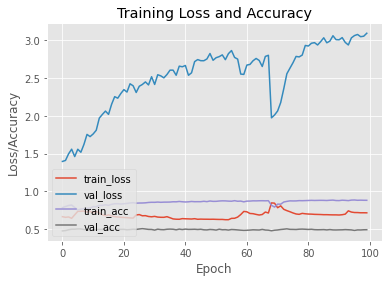

In [68]:
plot_training(history)